# Exercise 6.3: Geographical Visualizations with Python

This script contains the following:
1. Import data and libraries
2. Data wrangling
3. Conduct consistency checks
4. Plotting a choropleth
5. Exporting data   

## 1. Import data and libraries

In [10]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [11]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [14]:
#import JSONfile as a string to be used in the map.

country_geo = r'C:\Users\Barb\Desktop\CareerFoundry\Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\us-states.json'

In [7]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Barb\Desktop\CareerFoundry\Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\us-states.json')

# returns JSON object as a dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [16]:
path = r'C:\Users\Barb\19-09-2024 Gun Violence Data'

In [18]:
#Import the gun violence data from 6-1

df_gun = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-1.csv'), index_col = 0)

In [19]:
df_gun.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,1/1/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,1/1/2013,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,1/5/2013,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [22]:
df_gun.shape

(239677, 29)

## 2. Data Wrangling

In [24]:
# Ensure that case of state names in 'state' column of df_gun - which is in proper case - with case of STATE NAME column in
# JASON file - which is in proper case
# The cases of the states MATCH for both df_gun dataframe and JASON file

In [26]:
# Select only the necessary columns and put them in a list called columns

In [28]:
columns =['date', 'state', 'n_killed', 'n_injured', 'gun_stolen', 'gun_type', 'n_guns_involved','participant_age', 'participant_gender']

In [30]:
# Create a subset

state_gun = df_gun[columns]

In [32]:
state_gun.columns

Index(['date', 'state', 'n_killed', 'n_injured', 'gun_stolen', 'gun_type',
       'n_guns_involved', 'participant_age', 'participant_gender'],
      dtype='object')

In [34]:
state_gun.head()

,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_gender
0,1/1/2013,Pennsylvania,0,4,NaN,NaN,NaN,0::20,0::Male||1::Male||3::Male||4::Female
1,1/1/2013,California,1,3,NaN,NaN,NaN,0::20,0::Male
2,1/1/2013,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male
3,1/5/2013,Colorado,4,0,NaN,NaN,NaN,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male
4,1/7/2013,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female


In [36]:
type(state_gun)

pandas.core.frame.DataFrame

## 3. Conduct consistency checks

In [39]:
# Check for missing values

state_gun.isnull().sum()

date                      0
state                     0
n_killed                  0
n_injured                 0
gun_stolen            99498
gun_type              99451
n_guns_involved       99451
participant_age       92298
participant_gender    36362
dtype: int64

In [22]:
# Impute missing values of n_guns_involved with median; leave the rest of the missing values

state_gun['n_guns_involved'].fillna(state_gun['n_guns_involved'].median(), inplace=True)


C:\Users\Barb\AppData\Local\Temp\ipykernel_5724\1680979002.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  state_gun['n_guns_involved'].fillna(state_gun['n_guns_involved'].median(), inplace=True)
C:\Users\Barb\AppData\Local\Temp\ipykernel_5724\1680979002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_gun['n_guns_involved'].filln

In [41]:
# Last check for NaN; No missing values for n_guns_involved

state_gun.isnull().sum()

date                      0
state                     0
n_killed                  0
n_injured                 0
gun_stolen            99498
gun_type              99451
n_guns_involved       99451
participant_age       92298
participant_gender    36362
dtype: int64

### 3.1 Duplicates check

In [43]:
dups = state_gun.duplicated()

In [45]:
dups.shape # no dups

(239677,)

### 3.2 Extreme Values Check

<Axes: xlabel='n_killed', ylabel='Count'>

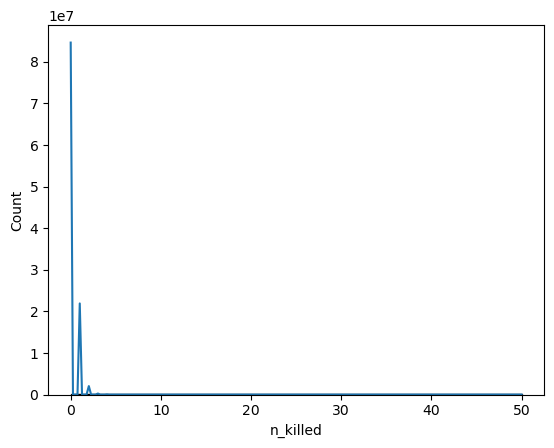

In [48]:
sns.histplot(state_gun['n_killed'], bins=1, kde = True) # shows extreme values for 'number_of_people_killed'

In [50]:
# Clean extreme values in 'n_killed'

state_gun_no_extreme = state_gun[state_gun['n_killed'] < 5]

<Axes: xlabel='n_killed', ylabel='Count'>

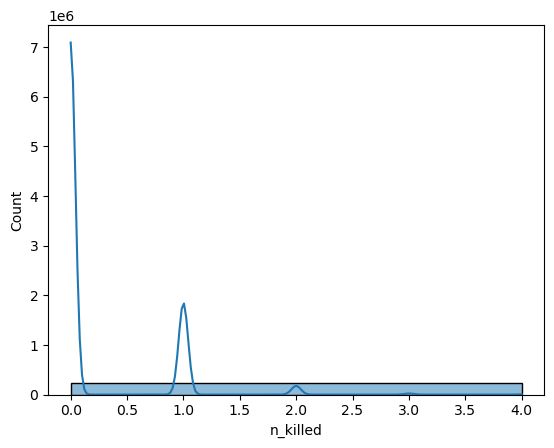

In [54]:
sns.histplot(state_gun_no_extreme['n_killed'], bins=1, kde = True)

<Axes: xlabel='n_guns_involved', ylabel='Count'>

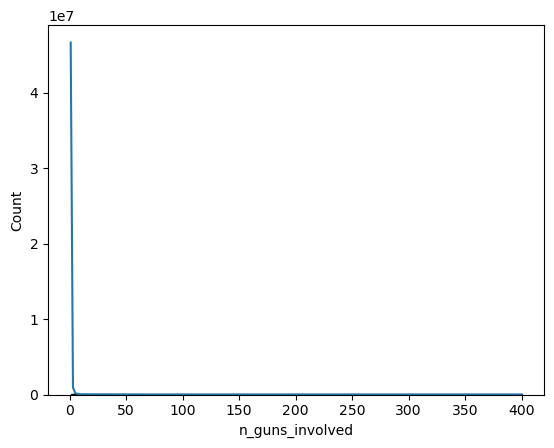

In [52]:
# Check the 'n_guns_involved' variable

sns.histplot(state_gun['n_guns_involved'], bins=1, kde = True)

In [56]:
# Select only entries with a non-zero amount and shorten amount

state_short_guns_involved = state_gun[(state_gun['n_guns_involved'] >= 1) & (state_gun['n_guns_involved'] < 5)]

<Axes: xlabel='n_guns_involved', ylabel='Count'>

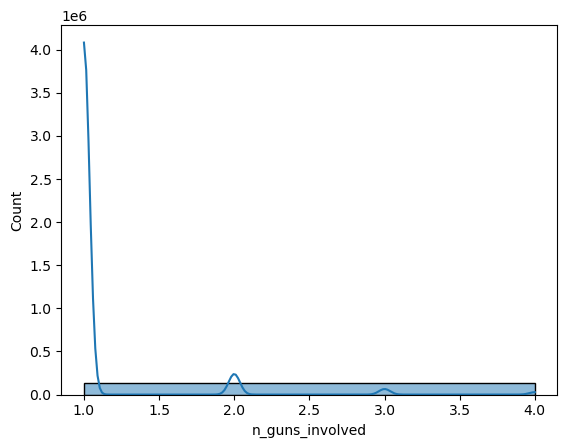

In [58]:
# Check the 'n_guns_involved' variable

sns.histplot(state_short_guns_involved['n_guns_involved'], bins=1, kde = True)

In [60]:
state_gun.dtypes

date                   object
state                  object
n_killed                int64
n_injured               int64
gun_stolen             object
gun_type               object
n_guns_involved       float64
participant_age        object
participant_gender     object
dtype: object

In [62]:
#Make the date "datetime" data type

In [64]:
state_gun['date'] = pd.to_datetime(df_gun['date'])

C:\Users\Barb\AppData\Local\Temp\ipykernel_10400\2035411046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_gun['date'] = pd.to_datetime(df_gun['date'])


In [66]:
state_gun.dtypes

date                  datetime64[ns]
state                         object
n_killed                       int64
n_injured                      int64
gun_stolen                    object
gun_type                      object
n_guns_involved              float64
participant_age               object
participant_gender            object
dtype: object

## 4. Plotting a choropleth

In [69]:
# Create a data frame with just the states and the values for number of people killed that we want plotted

data_to_plot = state_gun[['state','n_killed']]
data_to_plot.head()

,state,n_killed
0,Pennsylvania,0
1,California,1
2,Ohio,1
3,Colorado,4
4,North Carolina,2


In [71]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'n_killed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "number of people killed").add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
map.save('plot_data.html')

#### Task 6.3 #8 - The states where the most incidences of killings by guns are occurring are California and Maine. 
####               The analysis did not lead me to any new research questions.

## 5. Exporting this dataframe subset as a csv file

In [ ]:
# Check shape before exporting
state_gun.shape

In [ ]:
#Export the updated dataframe as a csv file
state_gun.to_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-3.csv'))

In [ ]:
## 6. Exporting this datafreame subset as a pkl file

In [ ]:
state_gun.to_pickle(os.path.join(path, '02 Data','Prepared', 'df_gun6-3.pkl'))